# Churn Modeling

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## **Install Catboost**

In [1]:
!pip install catboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install seaborn plotly xgboost lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip



## **Importing the libraries**

In [4]:
#ImportLib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Importing modelling libraries
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

## **Load and Prepare Data**

In [5]:
data = pd.read_csv("Churn.csv")
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0




---


### **Summary Information about the data:**

#### **1- Surname : The surname of the customer**
#### **2- CreditScore : The credit score of the customer**
#### **3- Geography : The country of the customer(Germany/France/Spain)**
#### **4- Gender : The gender of the customer (Female/Male)**
#### **5- Age : The age of the customer**
#### **6- Tenure : The customer's number of years in the in the bank**
#### **7- Balance : The customer's account balance**
#### **8- NumOfProducts : The number of bank products that the customer uses**
#### **9- HasCrCard : Does the customer has a card? (0=No,1=Yes)**
#### **10- IsActiveMember : Does the customer has an active mebership (0=No,1=Yes)**
#### **11- EstimatedSalary : The estimated salary of the customer**
#### **12) Exited : Churned or not? (0=No,1=Yes)**


---




## **EDA**

In [6]:
print("Shape of Data:" , data.shape)

Shape of Data: (10000, 14)


In [7]:
print("Data columns :" , data.columns)

Data columns : Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [8]:
print("Var types:", data.dtypes)

Var types: RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
pd.crosstab(data.Gender,data.Exited)

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [14]:
below_40_years = data[data.Age <= 40]
len(below_40_years)

6419

In [15]:
below_60_years = data[data.Age <= 60]
len(below_60_years)

9536

In [16]:
_60_years = data[data.Age == 60]
len(_60_years)

62

In [17]:
data[(data.Exited ==1) & (data.Age <= 30) ][['Age','Gender']]

,Age,Gender
7,29,Female
46,27,Female
86,22,Male
114,28,Male
164,29,Male
...,...,...
9539,29,Male
9554,29,Female
9572,18,Male
9748,24,Male


In [18]:
data[(data.Exited ==0) & (data.Age <= 30) ][['Age','Gender']]

,Age,Gender
9,27,Male
11,24,Male
13,25,Female
17,24,Female
19,24,Female
...,...,...
9988,30,Male
9989,28,Male
9993,28,Male
9994,29,Female


#### **Out of the total number of people below 30 years:**
#### **1820 have class_0 customers of the bank and 148 have left (class_1)**!

In [19]:
data.groupby('Exited').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


In [20]:
data.groupby('Geography').count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


## **Strorytelling - Visualization**

### Countries with the less and the most common use of credit cards

Geography
France     3543
Germany    1791
Spain      1721
Name: HasCrCard, dtype: int64


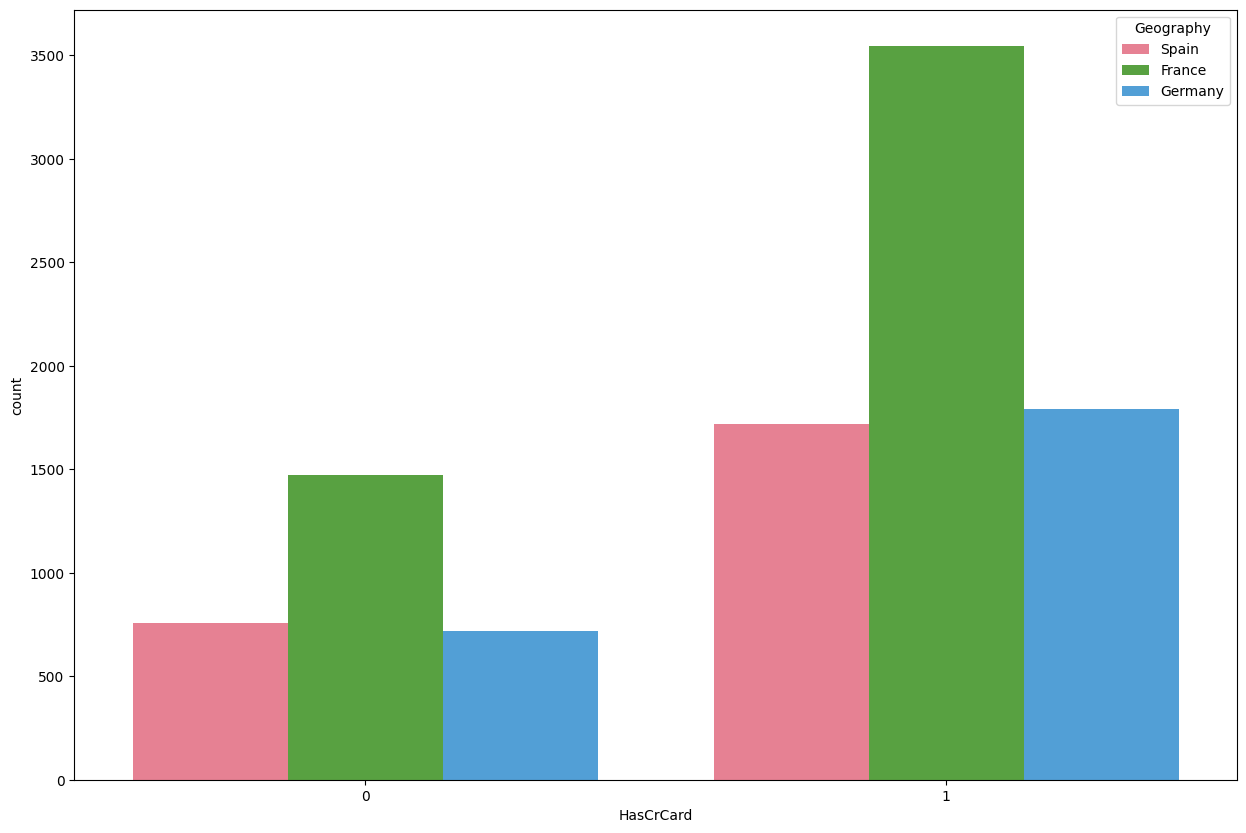

In [21]:
plt.figure(figsize = (15,10)) 
sns.countplot(x="HasCrCard",hue = "Geography", data=data, palette="husl")
print(data.groupby('Geography')["HasCrCard"].sum()) 

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64


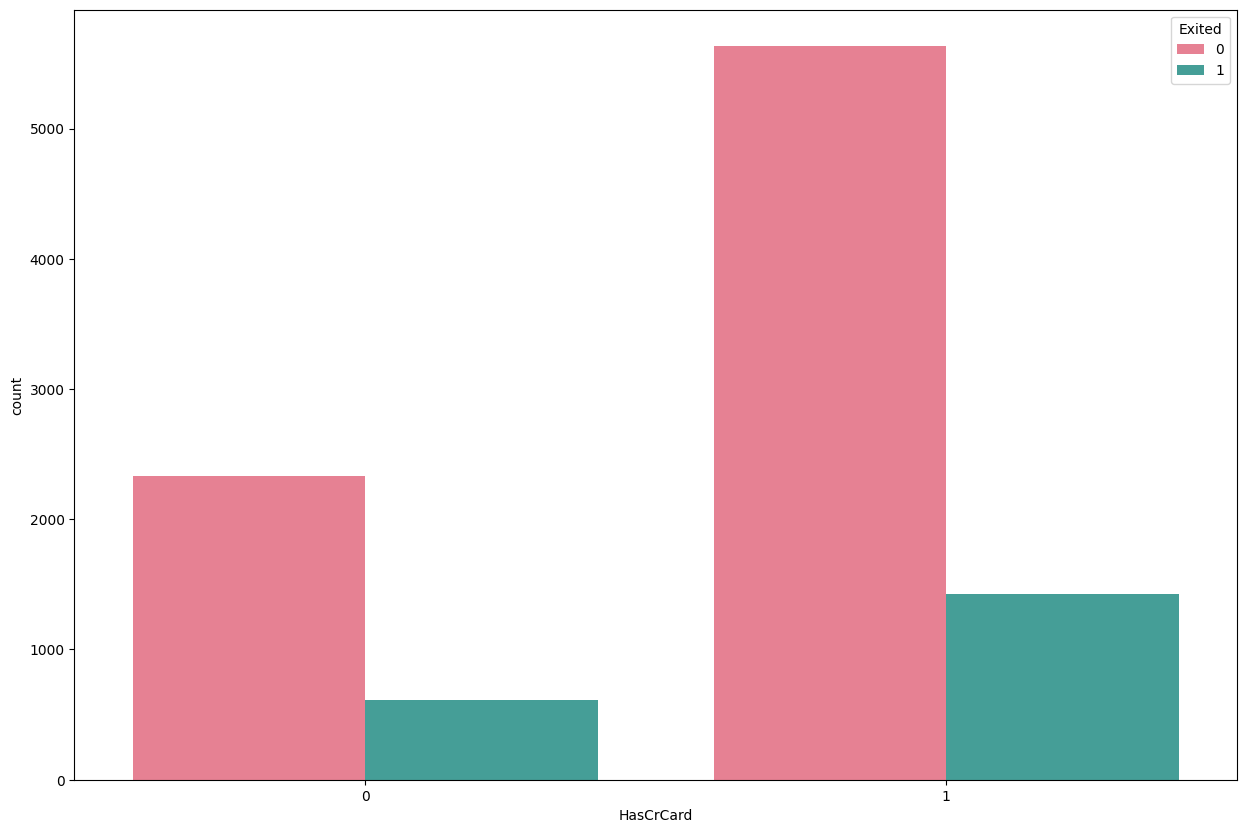

In [22]:
plt.figure(figsize = (15,10)) 
sns.countplot(x="HasCrCard",hue = "Exited", data=data, palette="husl")
print(data.groupby('Geography')["Exited"].sum())

<Figure size 1500x1000 with 0 Axes>

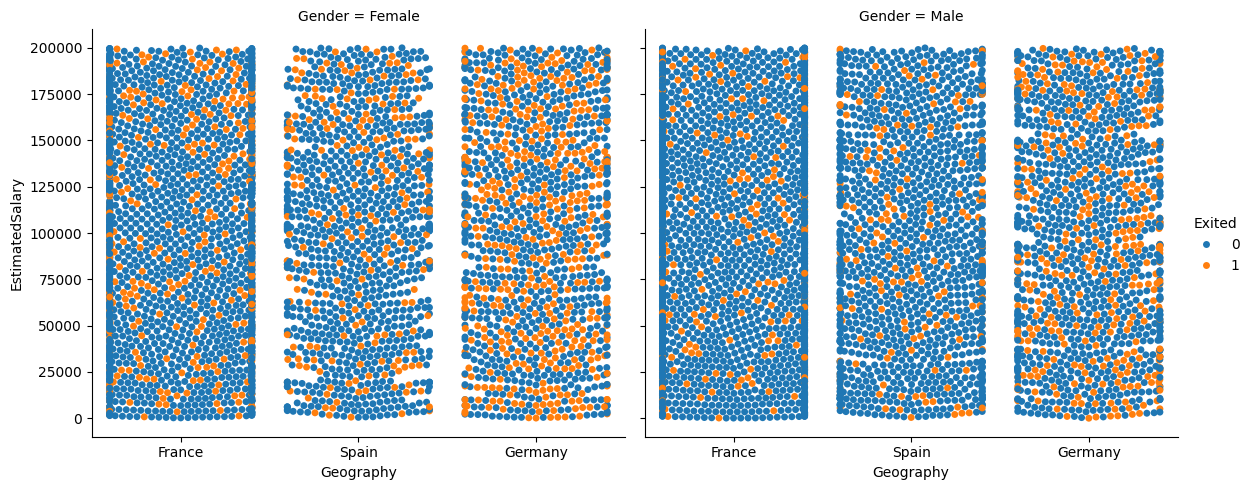

In [23]:
plt.figure(figsize = (15,10))
sns.catplot(x='Geography', y = "EstimatedSalary", hue="Exited", col="Gender", aspect=1.2,height=5,kind="swarm", data=data)

### **Another visualization about salary effect**

In [24]:
fig = px.box(data, x="Geography", y = "EstimatedSalary",color = 'Exited')
fig.update_layout(title_text="The country with the mean salary-With Outliers(Exited-Not Exited groups)")
fig.show()

### **Visualization of credit card’s usage according to ages**

Text(0, 0.5, 'Number of Credit Card Users')

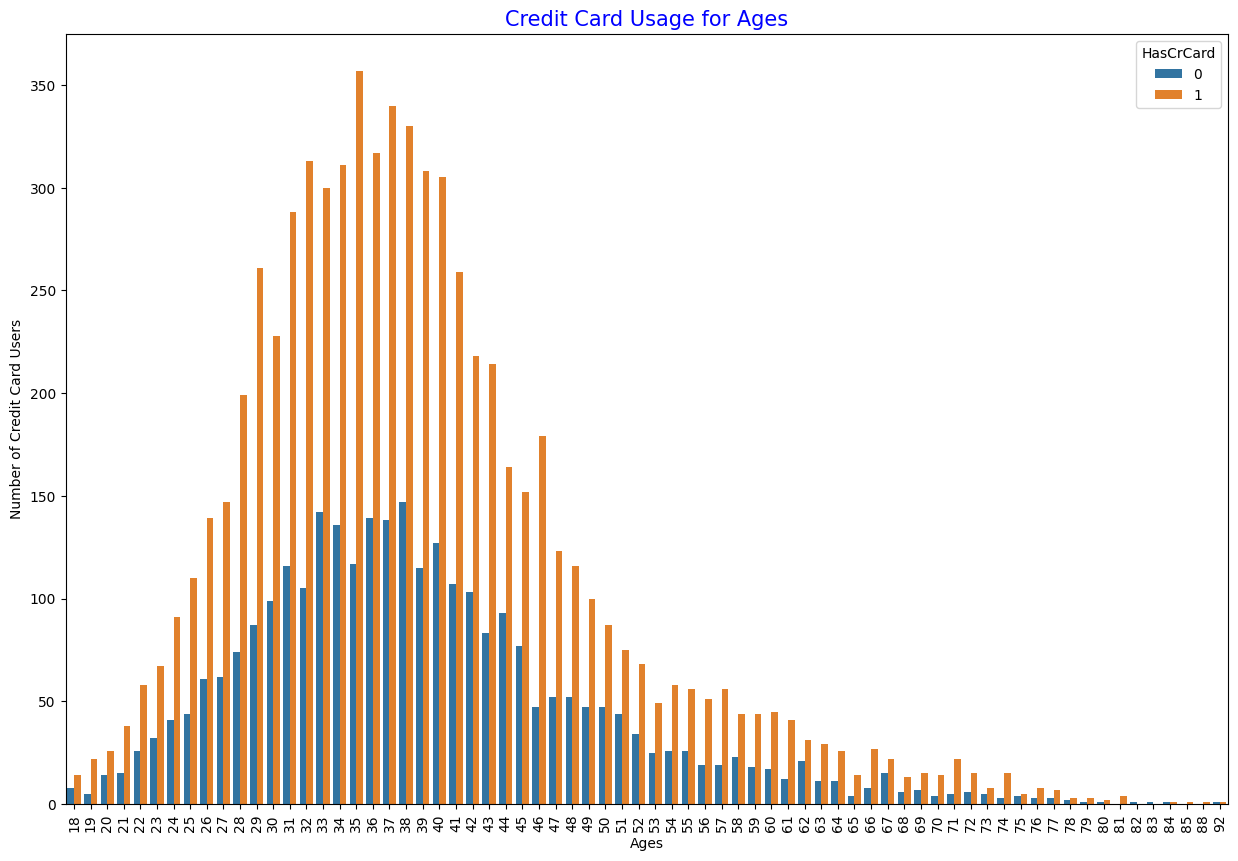

In [25]:
plt.figure(figsize = (15,10)) 
plt.xticks(rotation=90)
plt.title('Credit Card Usage for Ages',color = 'blue',fontsize=15)
sns.countplot(x=data["Age"],hue ='HasCrCard',data=data);
plt.xlabel('Ages')
plt.ylabel('Number of Credit Card Users')

### **Heatmap Representation 'Geography' and 'Excited'**

<Axes: xlabel='Exited', ylabel='Geography'>

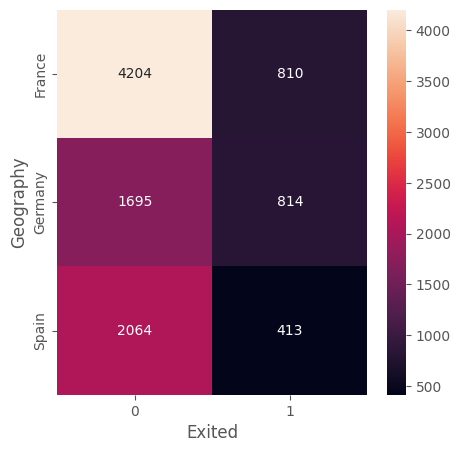

In [26]:
group = data.groupby(['Geography', 'Exited'])
Geography_Exited = group.size().unstack()
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (5,5))
sns.heatmap(Geography_Exited, annot = True, fmt ="d")

<Axes: xlabel='Gender', ylabel='Age'>

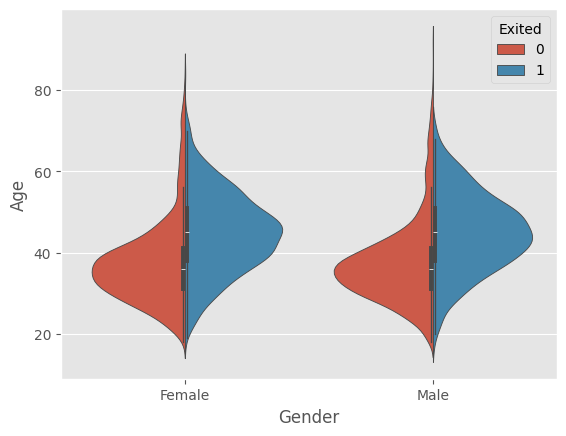

In [27]:
sns.violinplot(x ="Gender", y ="Age", hue ="Exited", data = data, split = True)

### **Make a function to get the composition of the variables per number of people**

In [28]:
#Make another copy of the new dataframe
descript = data.copy()
#And the survived keys
descript.loc[:,'Exited'].replace([0,1],['No','Yes'],inplace=True)

In [29]:
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):

    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    
    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))
    
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    
    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

#### **The gender with the highest credit score**

<Figure size 1500x1000 with 0 Axes>

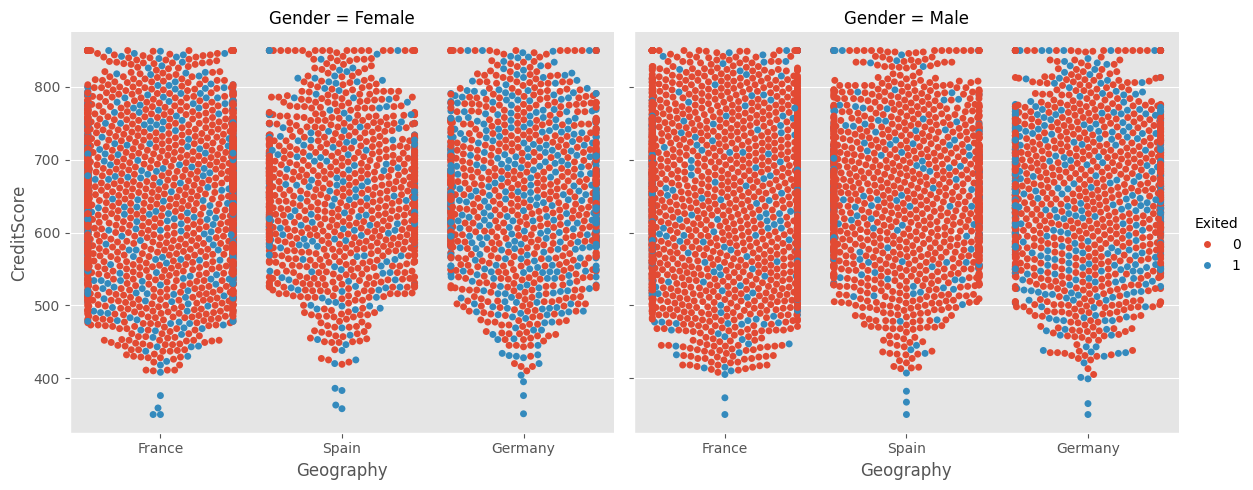

In [32]:
plt.figure(figsize = (15,10))
sns.catplot(x='Geography', y = "CreditScore", hue="Exited",col="Gender", aspect=1.2,height=5, kind="swarm", data=data)

#### **Customers in which age range work longer with their banks**

Text(0, 0.5, 'Number of customers (Exited or not)')

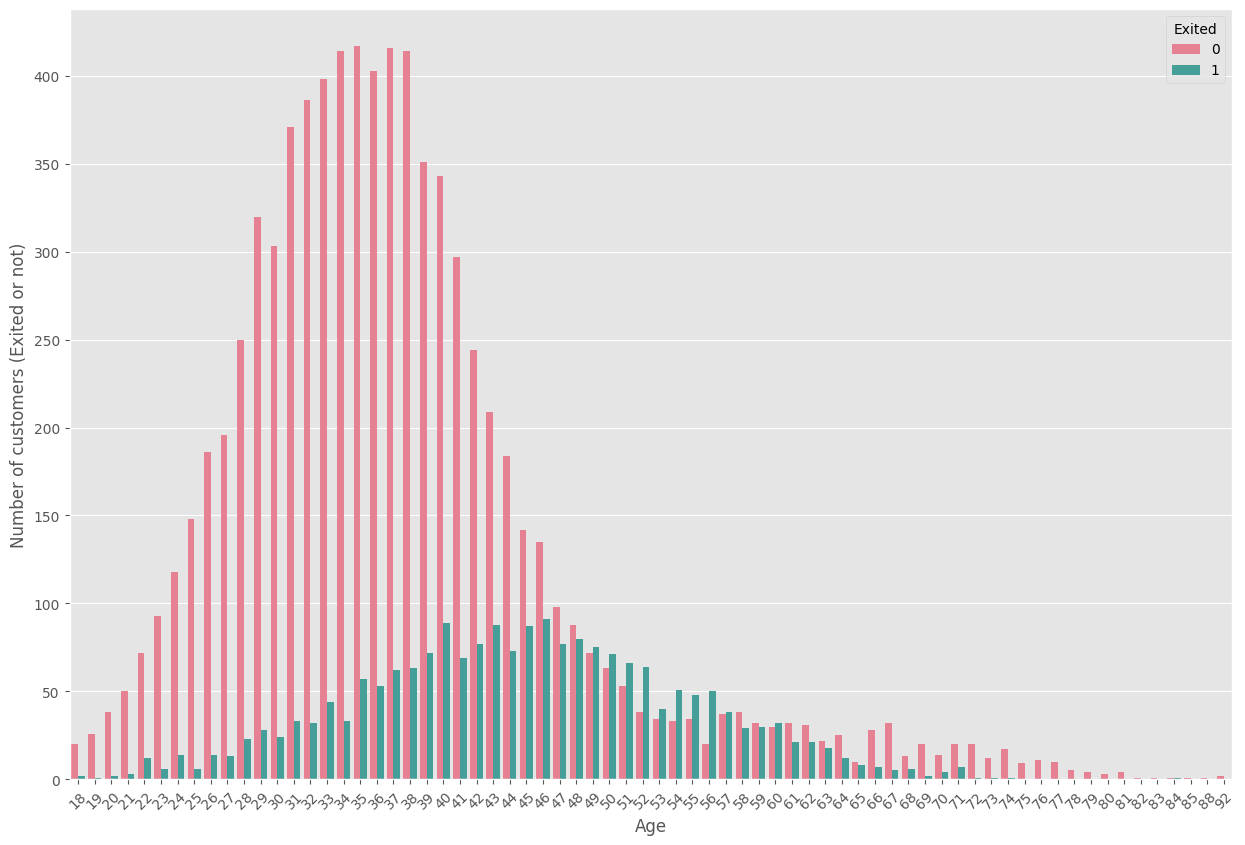

In [33]:
plt.figure(figsize = (15,10)) 
plt.xticks(rotation=45)
sns.countplot(x=data["Age"],hue = 'Exited',data=data, palette="husl")
plt.xlabel('Age')
plt.ylabel('Number of customers (Exited or not)')

#### **Rates of credit cards usage according to gender**

In [34]:
fig = px.parallel_categories(data, dimensions=['Gender', 'Geography', 'Exited'],
                color="Exited", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'Gender':'Gender(Female,Male)', 'Exited':'Exited(0:No,1:Yes)'})
fig.update_layout(title_text="Gender-Geography-Exited-Not Exited Schema")
fig.show()

#### **Divide Age into 6 bins and sum excited for all bins**

In [35]:
below_30 = data[data["Age"]<30]
between_30_40 = data[(data["Age"]>=30) & (data["Age"]<40)]
between_40_50 = data[(data["Age"]>=40) & (data["Age"]<50)]
between_50_60 = data[(data["Age"]>=50) & (data["Age"]<60)]
between_60_70 = data[(data["Age"]>=60) & (data["Age"]<70)]
above_70 = data[(data["Age"]>=70)]

k = below_30["Exited"].sum()
l = between_30_40["Exited"].sum()
m = between_40_50["Exited"].sum()
n = between_50_60["Exited"].sum()
o = between_60_70["Exited"].sum()
p = above_70["Exited"].sum()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, '70.0'),
  Text(1, 0, '71.0'),
  Text(2, 0, '72.0'),
  Text(3, 0, '73.0'),
  Text(4, 0, '74.0'),
  Text(5, 0, '75.0'),
  Text(6, 0, '76.0'),
  Text(7, 0, '77.0'),
  Text(8, 0, '78.0'),
  Text(9, 0, '79.0'),
  Text(10, 0, '80.0'),
  Text(11, 0, '81.0'),
  Text(12, 0, '82.0'),
  Text(13, 0, '83.0'),
  Text(14, 0, '84.0'),
  Text(15, 0, '85.0'),
  Text(16, 0, '88.0'),
  Text(17, 0, '92.0')])

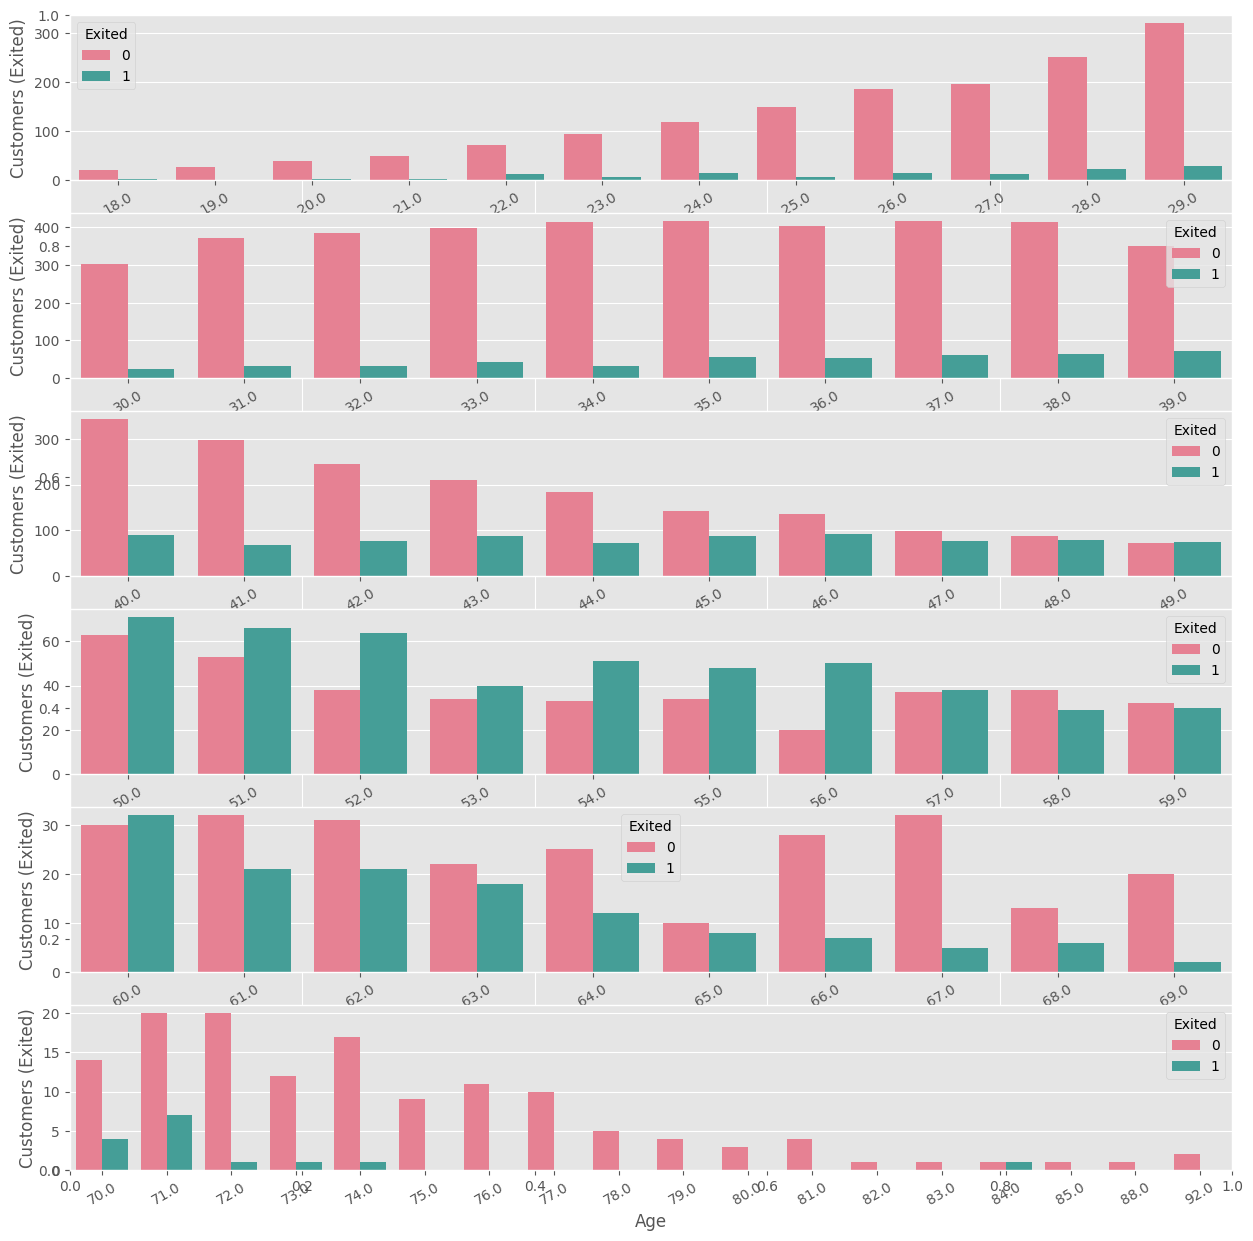

In [36]:
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(6,1,1)
sns.countplot(x=below_30["Age"],hue = 'Exited',data=data, palette="husl")
plt.xlabel('Age')
plt.ylabel('Customers (Exited)')
plt.xticks(rotation= 30)

plt.subplot(6,1,2)
sns.countplot(x=between_30_40["Age"],hue = 'Exited',data=data, palette="husl")
plt.xlabel('Age')
plt.ylabel('Customers (Exited)')
plt.xticks(rotation= 30)

plt.subplot(6,1,3)
sns.countplot(x=between_40_50["Age"],hue = 'Exited',data=data, palette="husl")
plt.xlabel('Age')
plt.ylabel('Customers (Exited)')
plt.xticks(rotation= 30)

plt.subplot(6,1,4)
sns.countplot(x=between_50_60["Age"],hue = 'Exited',data=data, palette="husl")
plt.xlabel('Age')
plt.ylabel('Customers (Exited)')
plt.xticks(rotation= 30)

plt.subplot(6,1,5)
sns.countplot(x=between_60_70["Age"],hue = 'Exited',data=data, palette="husl")
plt.xlabel('Age')
plt.ylabel('Customers (Exited)')
plt.xticks(rotation= 30)

plt.subplot(6,1,6)
sns.countplot(x=above_70["Age"],hue = 'Exited',data=data, palette="husl")
plt.xlabel('Age')
plt.ylabel('Customers (Exited)')
plt.xticks(rotation= 30)

In [37]:
age_list = [('Total Stayed=',below_30['Exited'].value_counts()[:1],"Ages below 30==>",k,"Exited"),
            ('Total stayed=',between_30_40['Exited'].value_counts()[:1],'Ages between 30-40==>',l,"Exited"),
            ('Total stayed=',between_40_50['Exited'].value_counts()[:1],"Ages between 40-50==>",m,"Exited"),
            ('Total stayed=',between_50_60['Exited'].value_counts()[:1],"Ages between 50-60==>",n,"Exited"),
            ('Total stayed=',between_60_70['Exited'].value_counts()[:1],"Ages between 60-70==>",o,"Exited"),
            ('Total stayed=',above_70['Exited'].value_counts()[:1],"Ages above 70==>",p,"Exited")]

#### **Pie** **Plot** **for** **Age** **Group** **excited** 

In [38]:
pie_list=[k,l,m,n,o,p]
labels=age_list
fig={
    "data":[
        {
            "values":pie_list,
            "labels":labels,
            "domain": {"x": [.2, 1]},
            "name": "Age Groups-Exit Rate",
            "hoverinfo":"label+percent+name",
            "hole": .4,
            "type": "pie"
        },],
    "layout":{
        "title":"Percentage of Age Groups for Longer Work With Bank",
        "annotations":[
            {
                "font":{"size":20},
                "showarrow": False,
                "text": "Age Group-Exited",
                "x": 0.60,
                "y": 0.50
            },
        ]
    }  
}
iplot(fig)

In [39]:
df = data.copy()
age_group_data = [None] * len(df['Age'])
for i in range(len(df['Age'])):
    if df['Age'][i] < 30:
        age_group_data[i] = 'Young'
    elif df['Age'][i] >=30 and df['Age'][i] < 40:
        age_group_data[i] = 'Young-Adults'
    elif df['Age'][i] >=40 and df['Age'][i] < 50:
        age_group_data[i] = 'Adults'
    elif df['Age'][i] >=50 and df['Age'][i] < 60:
        age_group_data[i] = 'Elderly-Adults'
    elif df['Age'][i] >=60 and df['Age'][i] < 74:
        age_group_data[i] = 'Old'
    else:
        age_group_data[i] = 'Very-Old'

df['age_group'] = age_group_data

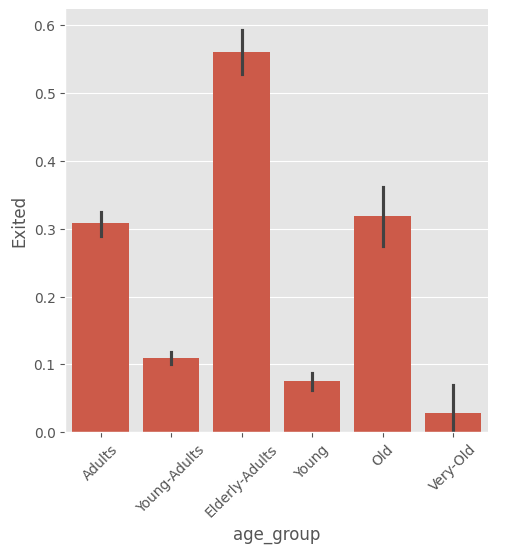

In [41]:
g = sns.catplot(x = "age_group", y = "Exited", data = df, kind = "bar")
plt.xticks(rotation=45)
g.set_ylabels("Exited")
plt.show()

## **Data Preprocessing**

In [42]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
#Make another copy of the new dataframe
NavidData = data.copy()

In [44]:
NavidData.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [45]:
#Drop the unwanted columns
NavidData.drop(['RowNumber','CustomerId','Surname'], axis=1 ,inplace = True)

In [46]:
NavidData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [47]:
NavidData.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


#### **Encoding Gender And Geography**

In [48]:
NavidData['Geography']=NavidData['Geography'].map({'France':2,'Spain':1,'Germany':0})
NavidData['Gender']=NavidData['Gender'].map({'Male':1,'Female':0})

In [49]:
NavidData.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,2,0,42,8,159660.80,3,1,0,113931.57,1
3,699,2,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,645,1,1,44,8,113755.78,2,1,0,149756.71,1
6,822,2,1,50,7,0.00,2,1,1,10062.80,0
7,376,0,0,29,4,115046.74,4,1,0,119346.88,1
8,501,2,1,44,4,142051.07,2,0,1,74940.50,0
9,684,2,1,27,2,134603.88,1,1,1,71725.73,0


## **Prepare Data for Machine learning**

In [50]:
#Creating Variables-Normalization
X = NavidData.iloc[:, :-1].values
Y = NavidData.iloc[:, -1].values

In [51]:
Y

array([1, 0, 1, ..., 1, 1, 0])

In [52]:
X

array([[6.1900000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

## **Splitting the dataset into the Training set and Test set**

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## **Feature Scaling**

In [54]:
# data normalization with sklearn
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
X_train.shape

(7000, 10)

## **Train All Classification models**

### **Create All Models**

In [56]:
r=26
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state=r)
XGBoostclassifier = XGBClassifier()
RandomForestclassifier = RandomForestClassifier(criterion = 'entropy')
SVMclassifier = SVC(kernel='rbf',probability=True)
LOGISTICclassifier = LogisticRegression()
KNNclassifier = KNeighborsClassifier()
GNBclassifier = GaussianNB() 
BaggingClassifier= BaggingClassifier(random_state=r)
NeuralNetworkClassifier= MLPClassifier(random_state=r)
CatBoost = CatBoostClassifier(random_state=r,verbose = False)
GBM = GradientBoostingClassifier(random_state=r)

### **Fitting models**

In [57]:
DTclassifier.fit(X_train, Y_train)
XGBoostclassifier.fit(X_train, Y_train)
RandomForestclassifier.fit(X_train, Y_train)
SVMclassifier.fit(X_train, Y_train)
LOGISTICclassifier.fit(X_train, Y_train)
KNNclassifier.fit(X_train, Y_train)
GNBclassifier.fit(X_train, Y_train)
BaggingClassifier.fit(X_train, Y_train)
NeuralNetworkClassifier.fit(X_train, Y_train)
CatBoost.fit(X_train, Y_train)
GBM.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=26)

### **Predict models**

In [58]:
DTpred = DTclassifier.predict(X_test)
XGBpred = XGBoostclassifier.predict(X_test)
RFpred = RandomForestclassifier.predict(X_test)
SVMpred = SVMclassifier.predict(X_test)
LOGISTICpred = LOGISTICclassifier.predict(X_test)
KNNpred = KNNclassifier.predict(X_test)
GNBpred = GNBclassifier.predict(X_test)
Baggingpred= BaggingClassifier.predict(X_test)
NNpred= NeuralNetworkClassifier.predict(X_test)
CatBoostpred= CatBoost.predict(X_test)
GBMpred= GBM.predict(X_test)

### **Print Accuracy Score For All Models**

In [59]:
DTaccuracy = accuracy_score(Y_test, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

XGBaccuracy = accuracy_score(Y_test, XGBpred)
print("Accuracy of the XGBoost Classifier: ",XGBaccuracy)

RFaccuracy = accuracy_score(Y_test, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

SVMaccuracy = accuracy_score(Y_test, SVMpred)
print("Accuracy of the SVM classifier: ",SVMaccuracy)

LOGISTICaccuracy = accuracy_score(Y_test, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

KNNaccuracy = accuracy_score(Y_test, KNNpred)
print("Accuracy of the KNN Classifier: ",KNNaccuracy)

GNBaccuracy = accuracy_score(Y_test, GNBpred)
print("Accuracy of the GNB Classifier: ", GNBaccuracy) 

Baggingaccuracy = accuracy_score(Y_test, Baggingpred)
print("Accuracy of the Bagging Classifier: ", Baggingaccuracy)

NNaccuracy = accuracy_score(Y_test, NNpred)
print("Accuracy of the Neural Network Classifier: ", NNaccuracy)

CatBoostaccuracy = accuracy_score(Y_test, CatBoostpred)
print("Accuracy of the CatBoost Classifier: ", CatBoostaccuracy)

GBMaccuracy = accuracy_score(Y_test, GBMpred)
print("Accuracy of the GBM Classifier: ", GBMaccuracy)

Accuracy of the Decision Tree Classifier:  0.8003333333333333
Accuracy of the XGBoost Classifier:  0.8643333333333333
Accuracy of the Random Forest Classifier:  0.8673333333333333
Accuracy of the SVM classifier:  0.8633333333333333
Accuracy of the Logistic Regression Classifier:  0.8176666666666667
Accuracy of the KNN Classifier:  0.836
Accuracy of the GNB Classifier:  0.835
Accuracy of the Bagging Classifier:  0.8503333333333334
Accuracy of the Neural Network Classifier:  0.866
Accuracy of the CatBoost Classifier:  0.8746666666666667
Accuracy of the GBM Classifier:  0.8733333333333333




---
| Model | Accuracy Score | 
| --- | --- | 
| Decision Tree Classifier | 0.80 |
|Logistic Regression Classifier | 0.81 |
| GBN Classifier | 0.835 |
| KNN Classifier | 0.836 |
| Bagging Classifier | 0.84 |
| SVM classifier | 0.86 |
| Neural Network Classifier | 0.86 |
| Random Forest Classifier | 0.86 |
| XGB Classifier | 0.870 |
| GBM Classifier | 0.873 |
| **Catboost** **Classifier** |**0**.**875** |

---



### **Making the Confusion Matrix for All Models**

### **confusion matrix And classification report for Decision Tree**

In [60]:
CMDecisionTree = confusion_matrix(Y_test,DTpred)
CMDecisionTree

array([[2105,  311],
       [ 288,  296]])

In [61]:
print(classification_report(Y_test, DTpred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.49      0.51      0.50       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000



### **confusion matrix And classification report for Logistic Regression Classifier**

In [62]:
CMLOGISTIC = confusion_matrix(Y_test,LOGISTICpred)
CMLOGISTIC

array([[2327,   89],
       [ 458,  126]])

In [63]:
print(classification_report(Y_test, LOGISTICpred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2416
           1       0.59      0.22      0.32       584

    accuracy                           0.82      3000
   macro avg       0.71      0.59      0.61      3000
weighted avg       0.79      0.82      0.78      3000



### **confusion matrix And classification report for Gaussian NaiveBayes  Classifier**

In [64]:
CMnb = confusion_matrix(Y_test,GNBpred)
CMnb

array([[2327,   89],
       [ 406,  178]])

In [65]:
print(classification_report(Y_test, GNBpred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2416
           1       0.67      0.30      0.42       584

    accuracy                           0.83      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.82      0.83      0.81      3000



### **confusion matrix And classification report for KNNClassifier**

In [66]:
CMknn = confusion_matrix(Y_test,KNNpred)
CMknn

array([[2292,  124],
       [ 368,  216]])

In [67]:
print(classification_report(Y_test, KNNpred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2416
           1       0.64      0.37      0.47       584

    accuracy                           0.84      3000
   macro avg       0.75      0.66      0.69      3000
weighted avg       0.82      0.84      0.82      3000



### **confusion matrix And classification report for Bagging Classifier**

In [68]:
CMbagging = confusion_matrix(Y_test,Baggingpred)
CMbagging

array([[2287,  129],
       [ 320,  264]])

In [69]:
print(classification_report(Y_test, Baggingpred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2416
           1       0.67      0.45      0.54       584

    accuracy                           0.85      3000
   macro avg       0.77      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



### **confusion matrix And classification report for SVM Classifier**

In [70]:
CMsvm = confusion_matrix(Y_test,SVMpred)
CMsvm

array([[2370,   46],
       [ 364,  220]])

In [71]:
print(classification_report(Y_test, SVMpred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.83      0.38      0.52       584

    accuracy                           0.86      3000
   macro avg       0.85      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000



### **confusion matrix And classification report for Neural Network Classifier**

In [72]:
cmNN = confusion_matrix(Y_test,NNpred)
cmNN

array([[2304,  112],
       [ 290,  294]])

In [73]:
print(classification_report(Y_test, NNpred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.72      0.50      0.59       584

    accuracy                           0.87      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



### **confusion matrix And classification report for Random Forest Classifier**


In [74]:
cmRF = confusion_matrix(Y_test,RFpred)
cmRF

array([[2328,   88],
       [ 310,  274]])

In [75]:
print(classification_report(Y_test, RFpred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



### **confusion matrix And classification report for XGBoost Classifier**

In [76]:
cmXGB = confusion_matrix(Y_test,XGBpred)
cmXGB 

array([[2310,  106],
       [ 301,  283]])

In [77]:
print(classification_report(Y_test, XGBpred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.48      0.58       584

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



### **confusion matrix And classification report for GBM Classifier**

In [78]:
cmGBM = confusion_matrix(Y_test,GBMpred)
cmGBM 

array([[2336,   80],
       [ 300,  284]])

In [ ]:
print(classification_report(Y_test, GBMpred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.78      0.49      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.87      0.87      0.86      3000



### **confusion matrix And classification report for CatBoost Classifier**

In [79]:
cmCatBoost = confusion_matrix(Y_test,CatBoostpred)
cmCatBoost 

array([[2337,   79],
       [ 297,  287]])

In [80]:
print(classification_report(Y_test, CatBoostpred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2416
           1       0.78      0.49      0.60       584

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.76      3000
weighted avg       0.87      0.87      0.86      3000



### **Applying k-Fold Cross Validation**

In [81]:
accuracies = cross_val_score(estimator = DTclassifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy for Decision Tree: {:.2f} %".format(accuracies.mean()*100))

Accuracy for Decision Tree: 79.21 %


In [82]:
accuracies1 = cross_val_score(estimator = LOGISTICclassifier, X = X_train, y = Y_train)
print("Accuracy for Logistic Regression: {:.2f} %".format(accuracies1.mean()*100))

Accuracy for Logistic Regression: 80.80 %


In [83]:
accuracies2 = cross_val_score(estimator = GNBclassifier, X = X_train, y = Y_train, cv=10)
print("Accuracy for Gaussian NaiveBayes: {:.2f} %".format(accuracies2.mean()*100))

Accuracy for Gaussian NaiveBayes: 82.76 %


In [84]:
accuracies3 = cross_val_score(estimator = KNNclassifier, X = X_train, y = Y_train)
print("Accuracy for KNNClassifier: {:.2f} %".format(accuracies3.mean()*100))

Accuracy for KNNClassifier: 82.69 %


In [85]:
accuracies4 = cross_val_score(estimator = BaggingClassifier, X = X_train, y = Y_train, cv=5)
print("Accuracy for Bagging Classifier: {:.2f} %".format(accuracies4.mean()*100))

Accuracy for Bagging Classifier: 84.89 %


In [86]:
accuracies5 = cross_val_score(estimator = SVMclassifier, X = X_train, y = Y_train, cv=10)
print("Accuracy for SVM: {:.2f} %".format(accuracies5.mean()*100))

Accuracy for SVM: 85.24 %


In [87]:
accuracies6 = cross_val_score(estimator = NeuralNetworkClassifier, X = X_train, y = Y_train, cv=10)
print("Accuracy for Neural Network Classifier: {:.2f} %".format(accuracies6.mean()*100)) 

Accuracy for Neural Network Classifier: 85.17 %


In [88]:
accuracies7 = cross_val_score(estimator = RandomForestclassifier, X = X_train, y = Y_train, cv=10)
print("Accuracy for Random Forest : {:.2f} %".format(accuracies7.mean()*100))

Accuracy for Random Forest : 85.93 %


In [89]:
accuracies8 = cross_val_score(estimator = XGBoostclassifier, X = X_train, y = Y_train, cv=10)
print("Accuracy  for XGBoost Classifier: {:.2f} %".format(accuracies8.mean()*100))  

Accuracy  for XGBoost Classifier: 84.79 %


In [90]:
accuracies9 = cross_val_score(estimator = GBM, X = X_train, y = Y_train)
print("Accuracy for GBM Classifier: {:.2f} %".format(accuracies9.mean()*100)) 

Accuracy for GBM Classifier: 85.71 %


In [91]:
accuracies10 = cross_val_score(estimator = CatBoost, X = X_train, y = Y_train)
print("Accuracy for CatBoost Classifier: {:.2f} %".format(accuracies10.mean()*100)) 

Accuracy for CatBoost Classifier: 86.14 %




---
| Model | Accuracy Score (Cross-Validation) | 
| --- | --- | 
| Decision Tree Classifier | 79.21 % |
|Logistic Regression Classifier | 80.80 % |
| GBN Classifier | 82.76 % |
| KNN Classifier | 82.69 % |
| Bagging Classifier | 84.86 %|
| SVM classifier | 85.24 %|
| Neural Network Classifier | 85.17 % |
| Random Forest Classifier | 85.83 % |
| XGB Classifier | 85.97 %|
| GBM Classifier | 85.71 %|
| **Catboost** **Classifier** |**86**.**09** %|

---



## **Applying Grid Search to find the best model and the best parameters**

### **Tuned best Models (Catboost)**

In [92]:
catb_params =  {'depth':[2, 3, 4],'loss_function': ['Logloss', 'CrossEntropy'],'l2_leaf_reg':np.arange(2,31)}
grid_search_Catboost = GridSearchCV(estimator = CatBoost, param_grid = catb_params, scoring = 'accuracy')

In [93]:
grid_search_Catboost.fit(X_train, Y_train) 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x142889590>,
             param_grid={'depth': [2, 3, 4],
                         'l2_leaf_reg': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'loss_function': ['Logloss', 'CrossEntropy']},
             scoring='accuracy')

In [94]:
best_accuracy_catboost = grid_search_Catboost.best_score_
print("Best Accuracy_Tuned Catboost: {:.2f} %".format(best_accuracy_catboost*100))

Best Accuracy_Tuned Catboost: 86.19 %


In [95]:
best_parameters_catboost = grid_search_Catboost.best_params_
print("Best Parameters:", best_parameters_catboost)

Best Parameters: {'depth': 2, 'l2_leaf_reg': 15, 'loss_function': 'Logloss'}


### **Fitting by Best Parameters**

In [96]:
Catboost_tuned = CatBoostClassifier(depth=2,l2_leaf_reg=28,loss_function='Logloss').fit(X_train,Y_train)
Catboost_tuned_pred = Catboost_tuned.predict(X_test)

0:	learn: 0.6746982	total: 16.8ms	remaining: 16.8s
1:	learn: 0.6574354	total: 19.2ms	remaining: 9.6s
2:	learn: 0.6424249	total: 21ms	remaining: 6.96s
3:	learn: 0.6275015	total: 23.7ms	remaining: 5.91s
4:	learn: 0.6143518	total: 25.6ms	remaining: 5.1s
5:	learn: 0.6019876	total: 27.7ms	remaining: 4.58s
6:	learn: 0.5902612	total: 29.2ms	remaining: 4.14s
7:	learn: 0.5788239	total: 30.9ms	remaining: 3.83s
8:	learn: 0.5677245	total: 32.9ms	remaining: 3.63s
9:	learn: 0.5582905	total: 34.6ms	remaining: 3.43s
10:	learn: 0.5496465	total: 36.3ms	remaining: 3.26s
11:	learn: 0.5411117	total: 37.9ms	remaining: 3.12s
12:	learn: 0.5321076	total: 39.8ms	remaining: 3.02s
13:	learn: 0.5241023	total: 41.7ms	remaining: 2.94s
14:	learn: 0.5169706	total: 43.3ms	remaining: 2.84s
15:	learn: 0.5095144	total: 45.4ms	remaining: 2.79s
16:	learn: 0.5027298	total: 48.1ms	remaining: 2.78s
17:	learn: 0.4971203	total: 50.3ms	remaining: 2.75s
18:	learn: 0.4908661	total: 53.6ms	remaining: 2.77s
19:	learn: 0.4857020	total

80:	learn: 0.3815441	total: 202ms	remaining: 2.29s
81:	learn: 0.3811815	total: 205ms	remaining: 2.3s
82:	learn: 0.3807965	total: 207ms	remaining: 2.29s
83:	learn: 0.3803283	total: 209ms	remaining: 2.28s
84:	learn: 0.3798911	total: 211ms	remaining: 2.27s
85:	learn: 0.3793062	total: 213ms	remaining: 2.27s
86:	learn: 0.3788185	total: 215ms	remaining: 2.26s
87:	learn: 0.3784844	total: 217ms	remaining: 2.25s
88:	learn: 0.3781237	total: 219ms	remaining: 2.25s
89:	learn: 0.3776331	total: 221ms	remaining: 2.24s
90:	learn: 0.3769749	total: 223ms	remaining: 2.23s
91:	learn: 0.3765586	total: 225ms	remaining: 2.23s
92:	learn: 0.3761084	total: 228ms	remaining: 2.22s
93:	learn: 0.3757888	total: 231ms	remaining: 2.22s
94:	learn: 0.3754759	total: 233ms	remaining: 2.22s
95:	learn: 0.3751577	total: 236ms	remaining: 2.22s
96:	learn: 0.3747676	total: 239ms	remaining: 2.22s
97:	learn: 0.3745057	total: 241ms	remaining: 2.21s
98:	learn: 0.3741331	total: 242ms	remaining: 2.21s
99:	learn: 0.3737804	total: 244m

In [97]:
CatboostAccuracy_tuned = accuracy_score(Y_test, Catboost_tuned_pred) * 100
print("Accuracy of the CatBoost Classifier Tuned: ",CatboostAccuracy_tuned)

Accuracy of the CatBoost Classifier Tuned:  87.3


| Model | Accuracy Score (Grid Search) | 
| --- | --- | 
| **Tuned Catboost** **Classifier** |**87**.**26** %|

## **Save your final model and Test**

In [98]:
## Save Model using Pickle
import pickle
pickle.dump(Catboost_tuned, open('Catboost', 'wb'))

In [99]:
My_Model = pickle.load(open('Catboost', 'rb'))

In [100]:
Predictor= My_Model.predict(X_test)

In [101]:
Predictor

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
NavidData.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,2,0,42,8,159660.80,3,1,0,113931.57,1
3,699,2,0,39,1,0.00,2,0,0,93826.63,0


In [103]:
New= np.array([500,2,0,43,7,149660.40,3,1,0,103921.57]).reshape(1,-1)
My_Model.predict(New) 

array([1])

#### **probability Classes**

In [104]:
My_Model.predict_proba(New)

array([[0.13671111, 0.86328889]])

In [105]:
New_Customer= np.array([699,2,0,39,1,0,2,0,0,93826.63]).reshape(1,-1)
My_Model.predict(New_Customer) 

array([0])

In [106]:
New_Customer_2= np.array([608,2,0,41,1,83807.86,1,0,1,112542.58]).reshape(1,-1)
My_Model.predict(New_Customer_2) 

array([0])

In [107]:
New_Customer_3= np.array([590,1,1,30,1,83550.86,1,1,1,132542.90]).reshape(1,-1)
My_Model.predict(New_Customer_3) 

array([0])

In [108]:
New_Customer_4= np.array([590,1,1,30,1,83550.86,1,1,1,132542.90]).reshape(1,-1)
My_Model.predict_proba(New_Customer_4)

array([[0.89002653, 0.10997347]])